In [1]:
import numpy as np
import scipy.stats as st
import seaborn as sns
%matplotlib inline

In [2]:
def generate_params(a, N, na):
    a_list = np.random.normal(3, 3, N)
    a_list[:na] = np.full((na, ), a)
    std_list = [1] * N
    np.random.shuffle(a_list)
    return a_list, std_list

In [3]:
def generate_samples(a, std, a_list, std_list, n=200):
    x = np.random.normal(a, std, n)
    pool = []
    for i in range(len(a_list)):
        pool.append(np.random.normal(a_list[i], std_list[i], n))
    return x, pool

In [4]:
def count_t(x, y):
    n = x.shape[0]
    m = y.shape[0]
    S1 = np.mean((x - np.mean(x))**2) * n / (n - 1)
    S2 = np.mean((y - np.mean(y))**2) * m / (m - 1)
    t = (np.mean(x) - np.mean(y)) / np.sqrt(1/n + 1/m)
    return t

In [5]:
def check_H0(t, alpha):
    z1 = st.norm.ppf(alpha / 2)
    z2 = st.norm.ppf(1 - alpha / 2)
    if z1 <= t <= z2:
        return True
    else:
        return False

In [6]:
def show_errors(a, std, N=100, na=4, n_iter=100, alpha=0.05, bf=False):
    a_list, std_list = generate_params(a, N, na)
    x, pool = generate_samples(a, std, a_list, std_list)
    
    typeI_errors = 0
    typeII_errors = 0
    H0 = True
    for i in range(N):
        t = count_t(x, pool[i])
        if bf:
            H0 = check_H0(t, alpha / N)
        else:
            H0 = check_H0(t, alpha)
            
        if a_list[i] == a and not H0:
            typeI_errors += 1
        elif a_list[i] != a and H0:
            typeII_errors += 1
            
    print("          |Верна H0 |Верна H1\n"
          "----------------------------\n"
          "Приняли H0| {}\t    |{}\n"
          "----------------------------\n"
          "Приняли H1| {}\t    |{}".format(na - typeI_errors, typeII_errors, 
                    typeI_errors, N - na - typeII_errors))

Были сгенерированы выборка из $\mathcal{N}(5, 1)$ и пул из $500$ выборок из нормального распределения с дисперсией $1$. $150$ из этих выборок имели мат. ожидание $5$, для остальных $350$ мат. ожидание было взято случайно из распределения $\mathcal{N}(3, 3)$. Для целевый выборки и выборки из пула были произведены проверки гипотезы о равенстве мат. ожиданий с уровнем значимости $\alpha=0.05$. Ниже в таблицах показаны значения ошибок I и II рода при обычном рассмотрении гипотез и с поправкой Бонферрони. Как видно, при обычном рассмотрении уровень ошибок I рода превышает $\alpha$, а поправка Бонферрони уменьшает ошибки I рода, увеличивая ошибки II рода.

In [7]:
a = 5
std = 1
print("\nРезультат проверки гипотез:\n")
show_errors(a, std, 500, 150)
print("\nРезультат проверки гипотез с поправкой Бонферрони:\n")
show_errors(a, std, 500, 150, bf=True)


Результат проверки гипотез:

          |Верна H0 |Верна H1
----------------------------
Приняли H0| 147	    |9
----------------------------
Приняли H1| 3	    |341

Результат проверки гипотез с поправкой Бонферрони:

          |Верна H0 |Верна H1
----------------------------
Приняли H0| 150	    |24
----------------------------
Приняли H1| 0	    |326


In [8]:
def show_FWER_plot(a, std, N=100, na=4, n_iter=100):
    a_list, std_list = generate_params(a, N, na)
    
    FWER_list = []
    for alpha in np.arange(0, 1.01, 0.05):
        FWER = 0
        for _ in range(n_iter):
            typeI_errors = 0
            x, pool = generate_samples(a, std, a_list, std_list)
            for i in range(N):
                t = count_t(x, pool[i])
                H0 = check_H0(t, alpha / N)
                if a_list[i] == a and not H0:
                    typeI_errors += 1
            
            if typeI_errors == 0:
                FWER += 1
                
        FWER_list.append(1 - (FWER / n_iter))
    
    sns.plt.plot(np.arange(0, 1.01, 0.05), FWER_list)
    sns.plt.plot([0, 1], [0, 1])
    sns.plt.legend(["зависимость FWER от уровня значимости", "прямая y=x"], bbox_to_anchor=(1, 1))
    sns.plt.xlabel('alpha')
    sns.plt.ylabel('FWER')
    sns.plt.show()

Ниже на графике показана зависимость групповой вероятности ошибки I рода (FWER) от выбранного уровня значимости $\alpha$ при поправке Бонферрони. Из графика видно, что поправка Бонферрони понижает FWER.

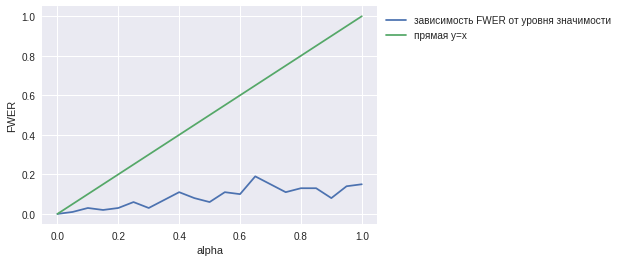

In [9]:
show_FWER_plot(a, std, N=100, na=27)